In [ ]:
# --- Libraries Import ---

# Data Manipulation & Analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning - Preprocessing & Model Selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder

# Machine Learning - Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Machine Learning - Evaluation Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
df = pd.read_csv("student-mat.csv", sep=";")

In [ ]:
df.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


In [ ]:
df.shape

(395, 33)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [ ]:
df.describe()


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [ ]:
selected_features = ['Medu','Fedu','traveltime','health','G1', 'G2','schoolsup','famsup','higher','internet', 'studytime', 'failures', 'absences', 'G3']
data = df[selected_features]


In [ ]:
data.isnull().sum()


,0
Medu,0
Fedu,0
traveltime,0
health,0
G1,0
G2,0
schoolsup,0
famsup,0
higher,0
internet,0


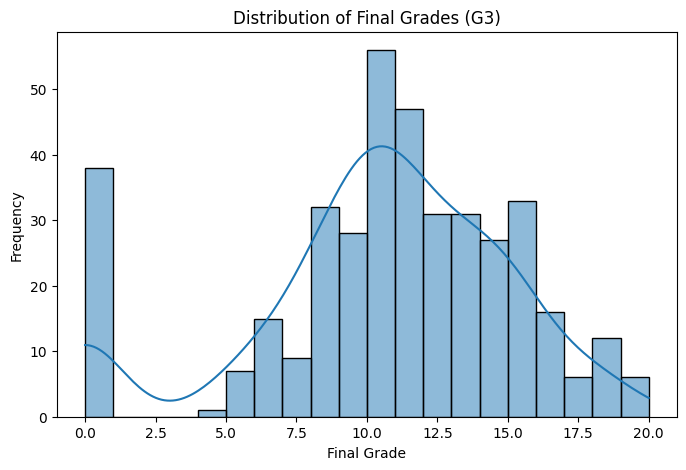

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(data['G3'], bins=20, kde=True)
plt.title("Distribution of Final Grades (G3)")
plt.xlabel("Final Grade")
plt.ylabel("Frequency")
plt.show()

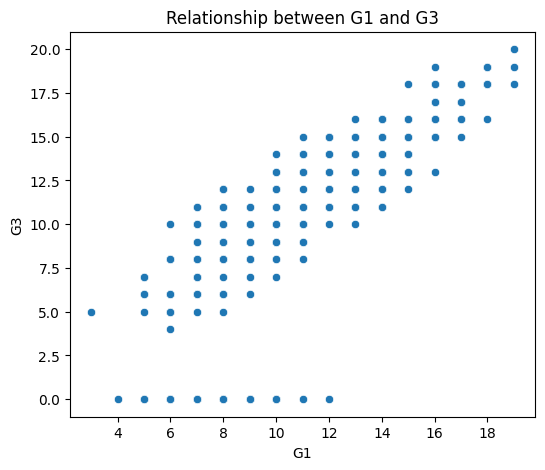

In [ ]:
plt.figure(figsize=(6,5))
sns.scatterplot(x='G1', y='G3', data=data)
plt.title("Relationship between G1 and G3")
plt.show()


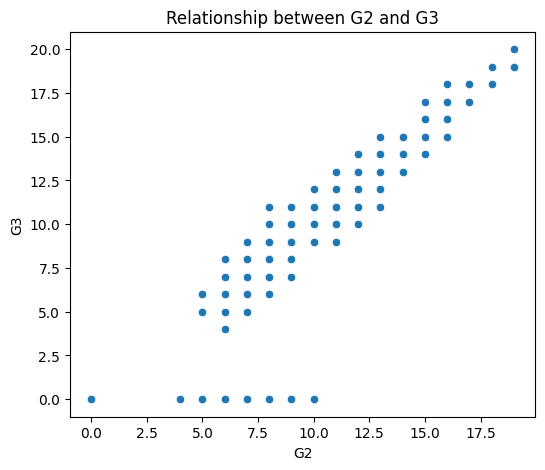

In [ ]:
plt.figure(figsize=(6,5))
sns.scatterplot(x='G2', y='G3', data=data)
plt.title("Relationship between G2 and G3")
plt.show()


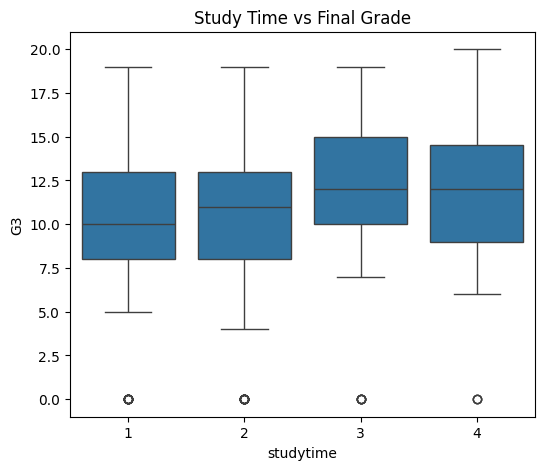

In [ ]:
plt.figure(figsize=(6,5))
sns.boxplot(x='studytime', y='G3', data=data)
plt.title("Study Time vs Final Grade")
plt.show()


## Prepare Data for Modeling

Separate the features (X) from the target variable (G3) and apply one-hot encoding to categorical features.


I need to separate the features (X) from the target variable (y) and apply one-hot encoding to the specified categorical features as per the instructions. This involves selecting the correct feature columns, creating X and y, identifying categorical columns, and then applying one-hot encoding.



In [ ]:
feature_columns = ['Medu', 'Fedu', 'traveltime', 'health', 'G1', 'G2', 'schoolsup', 'famsup', 'higher', 'internet', 'studytime', 'failures', 'absences']
X = df[feature_columns]
y = df['G3']

categorical_cols = ['schoolsup', 'famsup', 'higher', 'internet']
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("\nFirst 5 rows of X:")
display(X.head())
print("\nFirst 5 rows of y:")
display(y.head())

Shape of X: (395, 13)
Shape of y: (395,)

First 5 rows of X:


,Medu,Fedu,traveltime,health,G1,G2,studytime,failures,absences,schoolsup_yes,famsup_yes,higher_yes,internet_yes
0,4,4,2,3,5,6,2,0,6,True,False,True,False
1,1,1,1,3,5,5,2,0,4,False,True,True,True
2,1,1,1,3,7,8,2,3,10,True,False,True,True
3,4,2,1,5,15,14,3,0,2,False,True,True,True
4,3,3,1,5,6,10,2,0,4,False,True,True,False



First 5 rows of y:


,G3
0,6
1,6
2,10
3,15
4,10


In [ ]:
print(X['schoolsup_yes'].dtype)
print(X['schoolsup_yes'].head())

bool
0     True
1    False
2     True
3    False
4    False
Name: schoolsup_yes, dtype: bool


In [ ]:
print(X['schoolsup_yes'].astype(int).head())

0    1
1    0
2    1
3    0
4    0
Name: schoolsup_yes, dtype: int64


## Feature Engineering

To enhance the model's ability to capture complex relationships, I will generate polynomial features for 'G1' and 'G2' and an interaction term between 'Medu' and 'Fedu'. This allows the model to consider non-linear influences and combined effects on the final grade (G3).

In [ ]:
feature_columns = ['Medu', 'Fedu', 'traveltime', 'health', 'G1', 'G2', 'schoolsup', 'famsup', 'higher', 'internet', 'studytime', 'failures', 'absences']
X = df[feature_columns]
y = df['G3']

# --- Start of Feature Engineering ---
# 1. Polynomial Features for G1 and G2
# Generate polynomial features up to degree 2 for G1 and G2
poly = PolynomialFeatures(degree=2, include_bias=False)
g1_g2_poly = poly.fit_transform(X[['G1', 'G2']])

# Create a DataFrame from the polynomial features with appropriate column names
g1_g2_poly_df = pd.DataFrame(g1_g2_poly, columns=poly.get_feature_names_out(['G1', 'G2']), index=X.index)

# Drop the original 'G1' and 'G2' from X to avoid duplicate columns before concatenating
X = X.drop(columns=['G1', 'G2'])

# Concatenate the new polynomial features to the DataFrame X
X = pd.concat([X, g1_g2_poly_df], axis=1)

# 2. Interaction Feature: Medu * Fedu
X['Medu_Fedu_Interaction'] = X['Medu'] * X['Fedu']
# --- End of Feature Engineering ---

categorical_cols = ['schoolsup', 'famsup', 'higher', 'internet']
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("\nFirst 5 rows of X:")
display(X.head())
print("\nFirst 5 rows of y:")
display(y.head())

Shape of X: (395, 17)
Shape of y: (395,)

First 5 rows of X:


,Medu,Fedu,traveltime,health,studytime,failures,absences,G1,G2,G1^2,G1 G2,G2^2,Medu_Fedu_Interaction,schoolsup_yes,famsup_yes,higher_yes,internet_yes
0,4,4,2,3,2,0,6,5.0,6.0,25.0,30.0,36.0,16,True,False,True,False
1,1,1,1,3,2,0,4,5.0,5.0,25.0,25.0,25.0,1,False,True,True,True
2,1,1,1,3,2,3,10,7.0,8.0,49.0,56.0,64.0,1,True,False,True,True
3,4,2,1,5,3,0,2,15.0,14.0,225.0,210.0,196.0,8,False,True,True,True
4,3,3,1,5,2,0,4,6.0,10.0,36.0,60.0,100.0,9,False,True,True,False



First 5 rows of y:


,G3
0,6
1,6
2,10
3,15
4,10


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (316, 17)
Shape of X_test: (79, 17)
Shape of y_train: (316,)
Shape of y_test: (79,)


## Train a Regression Model

Initialize and train a suitable regression model (e.g., Linear Regression) using the training data to learn the relationship between the selected features and the final grade (G3).


To train a regression model, I need to import the LinearRegression model, instantiate it, and then fit it to the training data (X_train and y_train).



In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

print("Linear Regression model trained successfully.")

Linear Regression model trained successfully.


To evaluate the model's performance, I need to first make predictions on the test set using the trained model. Then, I will import the necessary metrics (MAE, MSE, R-squared) from `sklearn.metrics` to calculate and display them.



In [ ]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Absolute Error (MAE): 1.40
Mean Squared Error (MSE): 4.69
R-squared (R2): 0.77


To visualize the actual vs. predicted final grades, I will create a scatter plot. This plot will help in understanding the model's accuracy and how well the predictions align with the actual values. I'll use `matplotlib.pyplot` and `seaborn` for this.



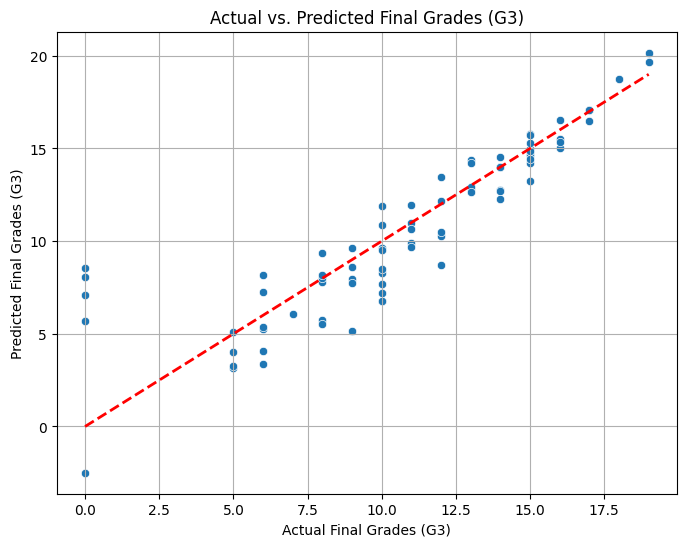

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Final Grades (G3)')
plt.ylabel('Predicted Final Grades (G3)')
plt.title('Actual vs. Predicted Final Grades (G3)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.grid(True)
plt.show()

## Implement Random Forest Regressor

To implement the Random Forest Regressor, I need to import it from `sklearn.ensemble`, instantiate the model, and then fit it to our training data (`X_train`, `y_train`). I'll use default parameters initially, which often provide a good starting point.

In [ ]:
# Initialize and train the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

print("Random Forest Regressor trained successfully.")

Random Forest Regressor trained successfully.


Evaluate the performance of the trained Random Forest Regressor using Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared on the test set.

In [ ]:
# Make predictions on the test set
rf_y_pred = rf_model.predict(X_test)

# Evaluate the model
rf_mae = mean_absolute_error(y_test, rf_y_pred)
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)

print(f"Random Forest - Mean Absolute Error (MAE): {rf_mae:.2f}")
print(f"Random Forest - Mean Squared Error (MSE): {rf_mse:.2f}")
print(f"Random Forest - R-squared (R2): {rf_r2:.2f}")

Random Forest - Mean Absolute Error (MAE): 1.12
Random Forest - Mean Squared Error (MSE): 3.32
Random Forest - R-squared (R2): 0.84


Visualize the actual versus predicted final grades (G3) for the Random Forest Regressor to visually inspect its accuracy.

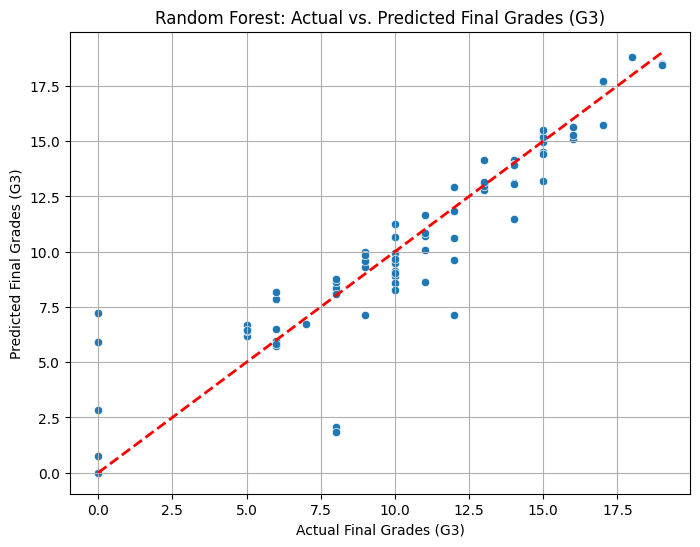

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=rf_y_pred)
plt.xlabel('Actual Final Grades (G3)')
plt.ylabel('Predicted Final Grades (G3)')
plt.title('Random Forest: Actual vs. Predicted Final Grades (G3)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.grid(True)
plt.show()

## Implement Gradient Boosting Regressor

To implement the Gradient Boosting Regressor, I need to import it from `sklearn.ensemble`, instantiate the model, and then fit it to our training data (`X_train`, `y_train`). I'll use default parameters initially, which often provide a good starting point.

In [ ]:
# Initialize and train the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

print("Gradient Boosting Regressor trained successfully.")

Gradient Boosting Regressor trained successfully.


Evaluate the performance of the trained Gradient Boosting Regressor using Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared on the test set.

In [ ]:
# Make predictions on the test set
gb_y_pred = gb_model.predict(X_test)

# Evaluate the model
gb_mae = mean_absolute_error(y_test, gb_y_pred)
gb_mse = mean_squared_error(y_test, gb_y_pred)
gb_r2 = r2_score(y_test, gb_y_pred)

print(f"Gradient Boosting - Mean Absolute Error (MAE): {gb_mae:.2f}")
print(f"Gradient Boosting - Mean Squared Error (MSE): {gb_mse:.2f}")
print(f"Gradient Boosting - R-squared (R2): {gb_r2:.2f}")

Gradient Boosting - Mean Absolute Error (MAE): 1.18
Gradient Boosting - Mean Squared Error (MSE): 3.70
Gradient Boosting - R-squared (R2): 0.82


Visualize the actual versus predicted final grades (G3) for the Gradient Boosting Regressor to visually inspect its accuracy.

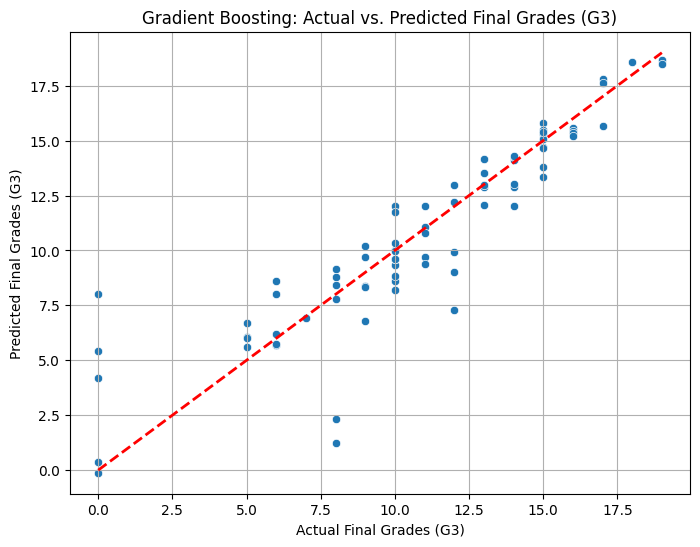

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=gb_y_pred)
plt.xlabel('Actual Final Grades (G3)')
plt.ylabel('Predicted Final Grades (G3)')
plt.title('Gradient Boosting: Actual vs. Predicted Final Grades (G3)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.grid(True)
plt.show()

### Summary of Model Performance:

I have explored three different regression models to predict student final grades (G3), incorporating feature engineering (polynomial features for G1/G2 and an interaction term for Medu/Fedu). Below is a comparison of their performance metrics on the test set:

**1. Linear Regression Model (with feature engineering):**
*   Mean Absolute Error (MAE): **1.40**
*   Mean Squared Error (MSE): **4.69**
*   Root Mean Squared Error (RMSE): **2.16**
*   R-squared (R2): **0.77**

**2. Random Forest Regressor (with feature engineering):**
*   Mean Absolute Error (MAE): **1.12**
*   Mean Squared Error (MSE): **3.32**
*   Root Mean Squared Error (RMSE): **1.82**
*   R-squared (R2): **0.84**

**3. Gradient Boosting Regressor (with feature engineering):**
*   Mean Absolute Error (MAE): **1.18**
*   Mean Squared Error (MSE): **3.70**
*   Root Mean Squared Error (RMSE): **1.92**
*   R-squared (R2): **0.82**

### Key Findings and Conclusion:

*   **Initial Baseline (Linear Regression):** The Linear Regression model provided a good baseline, explaining 77% of the variance in G3 with an average error of 1.40 points (MAE) and an RMSE of 2.16 points. While feature engineering was applied, it did not significantly improve the Linear Regression model's performance, suggesting its limitations in capturing complex, non-linear relationships.

*   **Significant Improvement with Ensemble Methods:** Both ensemble models, Random Forest and Gradient Boosting, significantly outperformed the Linear Regression model. This indicates that the relationships between the engineered features and the final grade are indeed non-linear and complex, which these models are better equipped to handle.

*   **Best Performing Model:** The **Random Forest Regressor** emerged as the top performer among the three, achieving the highest R-squared value of **0.84** and the lowest MAE (**1.12**), MSE (**3.32**), and RMSE (**1.82**). This model explains 84% of the variance in final grades, meaning its predictions are, on average, just over 1 point away from the actual grades, and its average error in the same units as the grades is 1.82 points.

*   **Gradient Boosting Performance:** The Gradient Boosting Regressor also performed exceptionally well, with an R-squared of 0.82 and an RMSE of 1.92, very close to the Random Forest. Its slightly higher MAE, MSE, and RMSE suggest it had slightly larger or more frequent errors compared to the Random Forest in this specific dataset.

**Overall Conclusion:** By applying feature engineering and moving to more sophisticated ensemble methods, we were able to significantly improve the accuracy of our student final grade predictions. The **Random Forest Regressor** stands out as the most effective model for this task, offering a robust and accurate tool for understanding and predicting student outcomes based on the selected features.

**Observation on Zero Grades (G3 = 0):**

---
Although the dataset is technically complete (no missing values), there is a subset of students who received a final grade of '0' despite having passing grades in previous periods (G1 and G2). The models consistently predicted passing grades for these students based on their history, resulting in higher prediction errors for this specific group. This suggests that a '0' in G3 likely represents an attendance issue (missed exam) rather than purely academic performance, behaving as an outlier that contradicts the student's typical grade trend.

## Feature Importance for Random Forest Regressor

To understand which features are most impactful in the Random Forest Regressor's predictions, we can access the `feature_importances_` attribute of the trained model. Visualizing these importances will help in explaining the model's decisions.

Top Features by Importance:


,Feature,Importance
10,G1 G2,0.293515
8,G2,0.266195
11,G2^2,0.253949
6,absences,0.108629
3,health,0.012751
1,Fedu,0.009557
12,Medu_Fedu_Interaction,0.009556
4,studytime,0.009063
13,schoolsup_yes,0.007802
0,Medu,0.006992


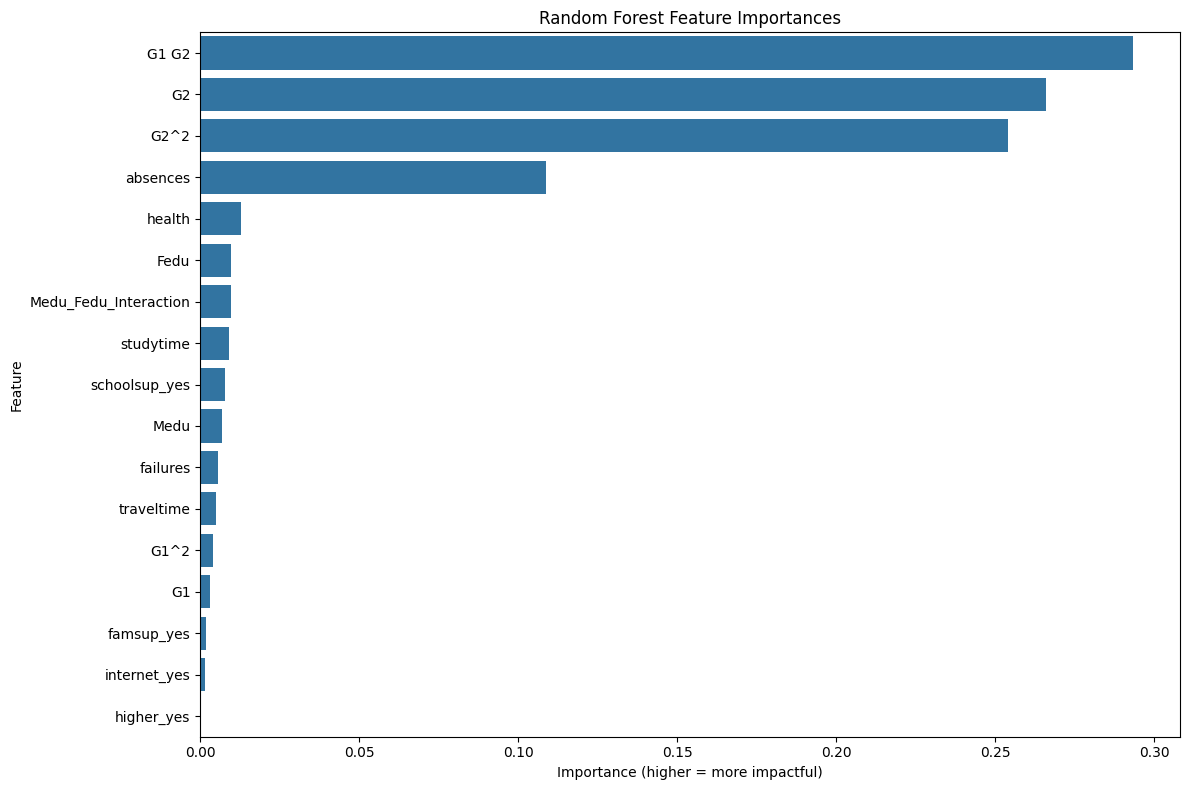

In [ ]:
# Get feature importances from the Random Forest model
importances = rf_model.feature_importances_

# Get feature names from the training data
feature_names = X_train.columns

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top features
print("Top Features by Importance:")
display(feature_importance_df.head(10))

# Visualize the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Random Forest Feature Importances')
plt.xlabel('Importance (higher = more impactful)')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

The feature importances from the Random Forest Regressor are very insightful! They tell us which factors the model considered most important when predicting the final grades (G3). Here's a breakdown of the top features:

**Top Features by Importance:**

*   **G1 G2 (Interaction Term):** `0.293515`
*   **G2 (Second Period Grade):** `0.266195`
*   **G2^2 (Polynomial Term):** `0.253949`
*   **absences:** `0.108629`
*   **health:** `0.012751`
*   **Fedu (Father's Education):** `0.009557`
*   **Medu_Fedu_Interaction:** `0.009556`
*   **studytime:** `0.009063`
*   **schoolsup_yes:** `0.007802`
*   **Medu (Mother's Education):** `0.006992`

### Key Insights & Findings:

1.  **Dominance of Past Performance (G1, G2):**
    *   The most critical factors influencing a student's final grade (G3) are overwhelmingly their performance in previous periods, specifically their second period grade (G2) and the combination of their first and second period grades (G1 and G2). This is a very strong indicator that past academic achievement is the most reliable predictor of future academic success in this context. The high importance of `G1 G2` and `G2^2` indicates that not only G2 itself, but also its squared term and its interaction with G1, are very predictive, suggesting complex relationships.

2.  **Impact of Absences:**
    *   Beyond academic performance, the number of absences from school is the next most significant factor. More absences tend to correlate with lower final grades, highlighting the importance of consistent attendance. This is a direct and understandable correlation.

3.  **Lesser but Noticeable Influence of Other Factors:**
    *   Other factors like a student's health status, parental education levels (Fedu, Medu, and their interaction), amount of study time, and whether they receive school support also play a role, but their individual impact is much smaller compared to prior grades and absences. For instance, higher parental education or more study time may contribute positively, while poorer health might have a negative impact.




**The results from the Random Forest model clearly demonstrate that a student's past academic performance (G1 and G2) and their attendance record (absences) are by far the most influential predictors of their final grades (G3). Other socio-economic and lifestyle factors have some influence, but to a much lesser extent.**